# Using Pandas to manipulate data

 <br><br>

First of all, before we can do anything with Pandas, we have to import it, so Python and Jupyter Notebook know how to use it.

In [32]:
import pandas as pd

<br><br>
## Reading and writing data from CSV files

CSV (Comma Sepparated Values) files are basically text files with comma's to separate the different fields in the rows of data. Every new line starts a new line of data in the set. Sometimes other characters are used to separate the data.

To read data from a file or an URL use the pd.read_csv function: 
```python
DataFrame = pd.read_csv('filename',
    sep = ',',  -> use comma as the separator while importing
    index_col = ['Date'], -> column to be used as index, can be a list                        
    parse_dates = ['Date'], -> specify which columns to treat as dates                    
    dayfirst = True, -> DD/MM format dates, international and European format                            
    na_values = [‘nope’, ‘Nein’, ‘non’], -> These values will be set to NaN
    dtype = {'Column': str}, -> explicitely saying that this column is a string
    encoding = 'utf-8'
).fillna(method='backfill') -> replaces NaN occurences with the next valid value from that column
```
The .fillna(method='backfill') is used to prevent NaN occurences that might cause problems while doing calculations later.

To write the processed data back to a CSV file use the to_CSV() function on a dataframe:
```python
DataFrame.to_csv('filename')
```

Lets load some data to work with while we look further into all of this

In [91]:
testData = pd.read_csv("./data/startdata.csv",sep = ';', index_col = ['Date and time'], parse_dates = ['Date and time'], dayfirst = True)

## DataFrames, Series and Lists

While working with Pandas you will be using DataFrames, Series and lists most of the time. The first two come from Pandas, the list is the default python one.

Basically, a DataFrame has an index and multiple columns, Series had an index and one column, and a List is just an array of values.

When working with DataFrames, you will often create new DataFrames or Series containing a limited subset of the original. One way to do this is by specifying which columns you want to use from the original. 

The format is slightly different depending on if you want a new DataFrame or Series:
```python
newDataFrame = OriginalDataFrame[['columnName']]
newSeries = OriginalDataFrame['columnName']
```
The difference is that for the DataFrame you use double square brackets "[[ ]]" and for Series single square brackets "[ ]" to indicate which columns to use.

In [7]:
testData[['Value']].head(3)

,Value
Date and time,
1/01/2019 0:00,85
1/01/2019 1:00,76
1/01/2019 2:00,99


In [8]:
testData['Value'].head(3)

Date and time
1/01/2019 0:00    85
1/01/2019 1:00    76
1/01/2019 2:00    99
Name: Value, dtype: int64

When executing in Jupyter notebook, you can see the difference between a DataFrame and a Series, the Dataframes output is more like a formatted html table, where is series is raw textdata without formatting.

If you want a new DataFrame with multiple columns, pass the columns in in the order you want them to be in:

In [12]:
testData[['Value2', 'Value']].head(3)

,Value2,Value
Date and time,,
1/01/2019 0:00,48,85
1/01/2019 1:00,64,76
1/01/2019 2:00,62,99


### Adding columns

Now that we have split up dataframes, we should also be able to reassemble them. To do this you can use **pd.concat()**. We will first split up the sample data to reassemble it afterwards:

In [30]:
td1 = testData['Value']
td2 = testData[['Value2', 'Visibility']]
result = pd.concat([td1, td2], axis=1)
result.head(3)

,Value,Value2,Visibility
Date and time,,,
1/01/2019 0:00,85,48,Show
1/01/2019 1:00,76,64,Show
1/01/2019 2:00,99,62,Show


As shown above, you can concatenate DataFrames and Series, just make sure that they are of the same length. 
Also note that you need to specify in which direction you want to concatenate. The **axis** option takes care of this. If you specify nothing or 0, then concat will add the items from the list passed to it as below eachother, which is not wat we want here, we want new columns to be added, for this use **axis=1**

<br>You can also add new rows to a DataFrame by specifying the name of the new column when assigning the data:

In [72]:
import random
tmp=[]
[tmp.append(random.randint(0,100)) for x in range(0,len(testData))]
testData['Random'] = tmp
testData.head(3)

,Visibility,Value,Value2,Value3,Random
Date and time,,,,,
2019-01-01 00:00:00,Show,36,99,A,18
2019-01-01 06:00:00,Show,7,96,B,82
2019-01-01 12:00:00,Show,90,43,C,23


### Removing columns

Now that we know how to add columns, we should also know how to remove them. There are two ways to do this. **drop** alows us to remove multiple columns at once and requires that we assign the result to a nw variable, **del** removes only one and works on the specified DataFrame.

In [28]:
#make copies to work on
DropTMP = testData.copy()
DelExample = testData.copy()

DropExample = DropTMP.drop(['Value', 'Value2'], axis=1)
del DelExample['Visibility']

print (DropExample.head(3))
print (DelExample.head(3))

               Visibility
Date and time            
1/01/2019 0:00       Show
1/01/2019 1:00       Show
1/01/2019 2:00       Show
                Value  Value2
Date and time                
1/01/2019 0:00     85      48
1/01/2019 1:00     76      64
1/01/2019 2:00     99      62


While importing we specified an index. This is the column that apears in bold when Jupiter Notebook displays a DataFrame. If we want to use this we can use **.index**. Let's add a column that contains the weekday, based on the date per row. Since we specified in the import that 'Date and time' is a date, we can use .weekday on it.

In [79]:
testData['weekday'] = testData[:].index.weekday
testData.head(5)

,Visibility,Value,Value2,Value3,Random,weekday
Date and time,,,,,,
2019-01-01 00:00:00,Show,36,99,A,18,1
2019-01-01 06:00:00,Show,7,96,B,82,1
2019-01-01 12:00:00,Show,90,43,C,23,1
2019-01-01 18:00:00,Show,50,14,D,52,1
2019-01-02 00:00:00,Show,67,16,E,95,2


## Filtering

### GroupBy

If there is a column with values that can be the same, the **groupby** function can be used to filter on those, e.g. postal codes. Once that grouping is done an aggregate function can be performed on that grouped data:

In [84]:
testData.groupby('Value3').mean()

,Value,Value2,Random,weekday
Value3,,,,
A,60.000,66.500,43.375,2.5
B,39.875,66.125,45.500,2.5
C,69.625,45.125,56.000,3.0
D,48.625,61.500,45.000,3.0
E,42.500,42.750,88.250,3.5
F,35.125,59.000,34.375,3.5


If we want to change the index (A, B, ..) to something more understandable, we can do so the following way:
```python
testData.index = ["First", "Second", "Third", "Fourth", "Fifth", "Sixt"]
```

### Resample

The resample function resamples the DataFrame into new buckets based on the column specified, whose size is determined by the specified interval. Then the specified operation is performed on those. Here we won't specify a column, which then uses the index, and we resample to days (D)

In [78]:
testData.resample("D").sum()

,Value,Value2,Random,weekday
Date and time,,,,
2019-01-01,183,252,175,4
2019-01-02,254,179,116,8
2019-01-03,208,200,206,12
2019-01-04,116,274,158,16
2019-01-05,134,181,334,20
2019-01-06,177,180,236,24
2019-01-07,251,202,192,0
2019-01-08,273,188,263,4
2019-01-09,194,177,288,8


## Plotting

Plotting alows us to see the data we get in columns in a more understandable way.

To use plotting we need to import it's library:
```Python
import matplotlib.pyplot as plt
```

A basic plot could look like this:
```Python
DataFrame.plot(
    kind='bar', -> plot a bargraph
    subplots=True -> display each column in a separate graphic when there is more than one
    label='Text per plotline/bar/etc',
    title="Title for the plot"
)
```

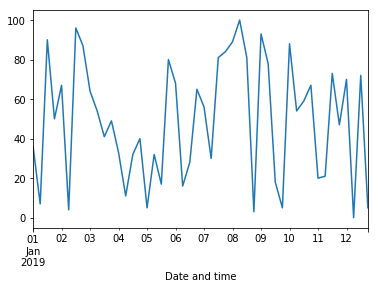

In [87]:
import matplotlib.pyplot as plt
testData['Value'].plot()

To plot True/False data, convert it to a float first: DataFrame['Column'].astype(float).plot()

## Row operations

You can perform functions on all the fields in a column at once and then do further processing with those results. We will check if the 'visibility' column contains 'hide'. The **str.contains()** function will return a boolean per row.

In [92]:
rowsToHide = testData['Visibility'].str.contains("Hide").fillna(false)
rowsToHide.head(5)

Date and time
2019-01-01 00:00:00    False
2019-01-01 06:00:00     True
2019-01-01 12:00:00    False
2019-01-01 18:00:00    False
2019-01-02 00:00:00    False
Name: Visibility, dtype: bool

As contains returns a boolean we get a list of True/False variables which is the same size as the original DataFrame.
Because there could be 'incorrect' strings in there, you can add **.fillna(false)** after the closing bracket of the contains to set those to false in the returned results, or any other acceptable value, depending on what the function returns.

In a case like this, where you get a Series of booleans returned, you can reverse this with ~(name)
```python
rowsToShow = ~(rowsToHide)
```

These Series can be used with a DataFrame to only show/use those that are true by adding it in a sepparate set of square brackets. Note that here we do not use quotes inside the square brackets.

In [93]:
testData[rowsToHide]

,Visibility,Value,Value2,Value3
Date and time,,,,
2019-01-01 06:00:00,Hide,73,37,B
2019-01-04 12:00:00,Hide,95,39,C
2019-01-06 12:00:00,Hide,83,95,E
2019-01-08 18:00:00,Hide,91,61,B
2019-01-11 00:00:00,Hide,1,74,E


<br>You can also use them to select one or more columns:

In [99]:
testData['Value'][rowsToHide]

Date and time
2019-01-01 06:00:00    0
2019-01-04 12:00:00    0
2019-01-06 12:00:00    0
2019-01-08 18:00:00    0
2019-01-11 00:00:00    0
Name: Value, dtype: int64

<br>Above we made a variable rowsToHide, but if we only need this once, we can also do this inline:

In [95]:
testData['Value'][testData['Visibility'].str.contains("Hide")]

Date and time
2019-01-01 06:00:00    73
2019-01-04 12:00:00    95
2019-01-06 12:00:00    83
2019-01-08 18:00:00    91
2019-01-11 00:00:00     1
Name: Value, dtype: int64

We can use these Series with boolean values in combination with **.loc** to set values in the selected rows to a different value, without changing the others:

In [96]:
testData.loc[rowsToHide, 'Value'] = 0
testData.head(5)

,Visibility,Value,Value2,Value3
Date and time,,,,
2019-01-01 00:00:00,Show,30,42,A
2019-01-01 06:00:00,Hide,0,37,B
2019-01-01 12:00:00,Show,44,51,C
2019-01-01 18:00:00,Show,61,8,D
2019-01-02 00:00:00,Show,26,1,E
